In this model we classify social media posts as positive, negative, or neutral.(sentiment analysis)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
raw_data = pd.read_csv('C:\\Users\\Pradhuman_kumar(pk)\\Documents\\Sentiment.csv')

In [34]:
raw_data.head()

,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,07-08-2015 09:54,6.296970e+17,NaN,Quito
1,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,07-08-2015 09:54,6.296970e+17,NaN,NaN
2,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,07-08-2015 09:54,6.296970e+17,NaN,NaN
3,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,07-08-2015 09:54,6.296970e+17,Texas,Central Time (US & Canada)
4,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,07-08-2015 09:54,6.296970e+17,NaN,Arizona


In [35]:
raw_data.shape

(13871, 20)

Data Collection: dataset of social media posts with labeled sentiments.

In [36]:
# extract essintial features from whole feature that is 
# sentiment
# text

data = pd.DataFrame(raw_data, columns=['sentiment' , 'text'])
data

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
...,...,...
13866,Negative,RT @cappy_yarbrough: Love to see men who will ...
13867,Positive,RT @georgehenryw: Who thought Huckabee exceede...
13868,Positive,"RT @Lrihendry: #TedCruz As President, I will a..."
13869,Negative,RT @JRehling: #GOPDebate Donald Trump says tha...


In [37]:
data.isnull().sum()

sentiment    0
text         0
dtype: int64

In [38]:
data.shape

(13871, 2)

In [39]:
data['sentiment'].value_counts()

sentiment
Negative    8493
Neutral     3142
Positive    2236
Name: count, dtype: int64

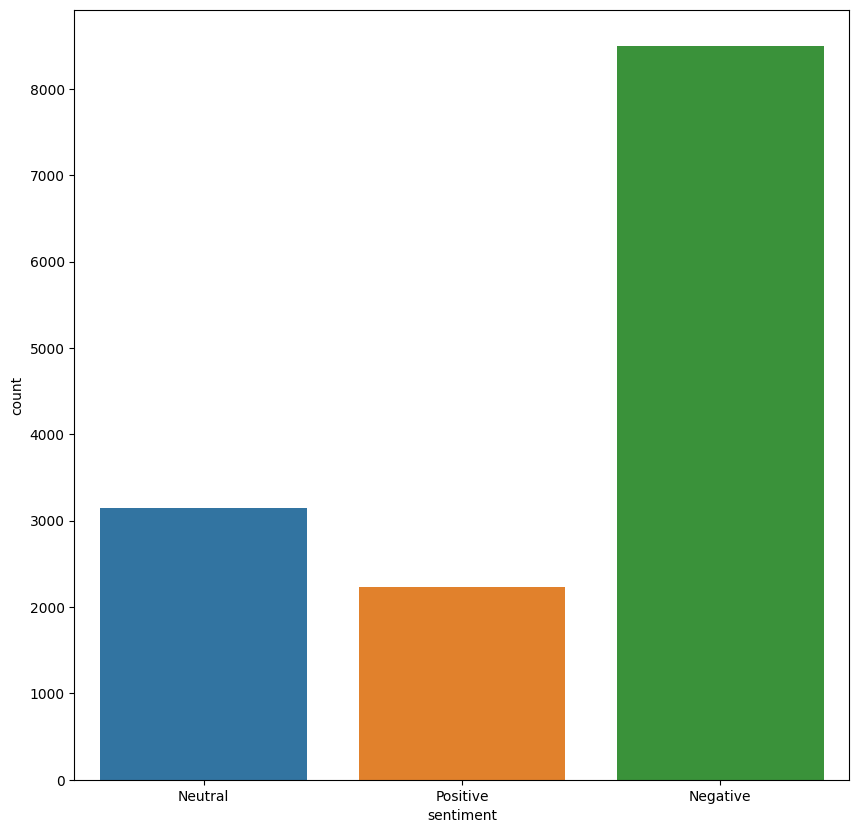

In [40]:
plt.figure(figsize=(10,10))
sb.countplot(data=data,x='sentiment')
plt.show()

convert text label to numerical value

In [41]:
label_data = LabelEncoder()
data['sentiment'] = label_data.fit_transform(data['sentiment'])

In [42]:
data[:5]

,sentiment,text
0,1,RT @NancyLeeGrahn: How did everyone feel about...
1,2,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,1,RT @TJMShow: No mention of Tamir Rice and the ...
3,2,RT @RobGeorge: That Carly Fiorina is trending ...
4,2,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [43]:
# extract essintial features from whole feature that is 
# feature = text
# label = sentiment

feature = data['text']
target = data['sentiment']


In [44]:
feature

0        RT @NancyLeeGrahn: How did everyone feel about...
1        RT @ScottWalker: Didn't catch the full #GOPdeb...
2        RT @TJMShow: No mention of Tamir Rice and the ...
3        RT @RobGeorge: That Carly Fiorina is trending ...
4        RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
                               ...                        
13866    RT @cappy_yarbrough: Love to see men who will ...
13867    RT @georgehenryw: Who thought Huckabee exceede...
13868    RT @Lrihendry: #TedCruz As President, I will a...
13869    RT @JRehling: #GOPDebate Donald Trump says tha...
13870    RT @Lrihendry: #TedCruz headed into the Presid...
Name: text, Length: 13871, dtype: object

Text Preprocessing: preprocess the text data by removing special characters, stopwords

In [45]:
nltk.download('stopwords')
stopwords = stopwords.words('english')
len(stopwords), print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pradhuman_kumar(pk)\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


(179, None)

In [46]:
port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', " ", content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [47]:
feature = feature.apply(stemming)
feature = feature.values

In [48]:
feature

array(['rt nancyleegrahn everyon feel climat chang question last night exactli gopdeb',
       'rt scottwalk catch full gopdeb last night scott best line second walker http co zsff',
       'rt tjmshow mention tamir rice gopdeb held cleveland wow', ...,
       'rt lrihendri tedcruz presid alway tell truth said would gopdeb',
       'rt jrehl gopdeb donald trump say time polit correct call women fat pig save',
       'rt lrihendri tedcruz head presidenti debat go ted gopdeb http co pz'],
      dtype=object)

In [49]:
target

0        1
1        2
2        1
3        2
4        2
        ..
13866    0
13867    2
13868    2
13869    0
13870    2
Name: sentiment, Length: 13871, dtype: int32

spliting data into training and testing data

In [50]:
# spiliting data into training and test data
x_train,x_test,y_train,y_test=train_test_split(feature, target,test_size=0.2,random_state=3)

In [51]:
feature.shape,x_train.shape,x_test.shape

((13871,), (11096,), (2775,))

Feature Extraction: Convert the text data into numerical features using techniques like TF-IDF.

In [52]:
# feature extration (transform text data into numeric value whic can feeed into the machine for trainning)
numerical_data = TfidfVectorizer(stop_words='english',lowercase=True)  #(min_score of words is 1 else ignored,not importent words is ignored,choose in lowercase)
numerical_data.fit(feature)
x_train = numerical_data.transform(x_train)  # fitting data 
x_test = numerical_data.transform(x_test) #dont_fit

In [53]:
# print(x_train)

In [54]:
# print(x_test)

Model Selection: Choose a suitable classification algorithm such as Naive Bayes, Support Vector Machines, or a neural network.

In [55]:
from sklearn.svm import SVC

In [63]:
kernel =['linear']
for kernel in kernel:
    model = SVC(C=0.5,degree=2, kernel=kernel)

    model.fit(x_train,y_train)
    print(model)

    train_predict = model.predict(x_train)
    acc1 = accuracy_score(y_train,train_predict)
    print("training_acc: ",acc1)

    test_predict = model.predict(x_test)
    acc2 = accuracy_score(y_test,test_predict)
    print("testing_acc: ",acc2,"\n")

SVC(C=0.5, degree=2, kernel='linear')
training_acc:  0.7600937274693583
testing_acc:  0.6886486486486486 

